In [ ]:
import numpy as np 
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dropout,Dense,MaxPooling2D,Flatten,Resizing,GlobalAveragePooling2D,BatchNormalization
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from skimage.transform import resize
from keras.utils import to_categorical
import keras as k
import tensorflow as tf

In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=100,resize=1,color=True)

In [ ]:
X = lfw.images
X.shape

(1140, 125, 94, 3)

In [ ]:
y= lfw.target
target_name=lfw.target_names
print(len(target_name))
print(y.shape)

5
(1140,)


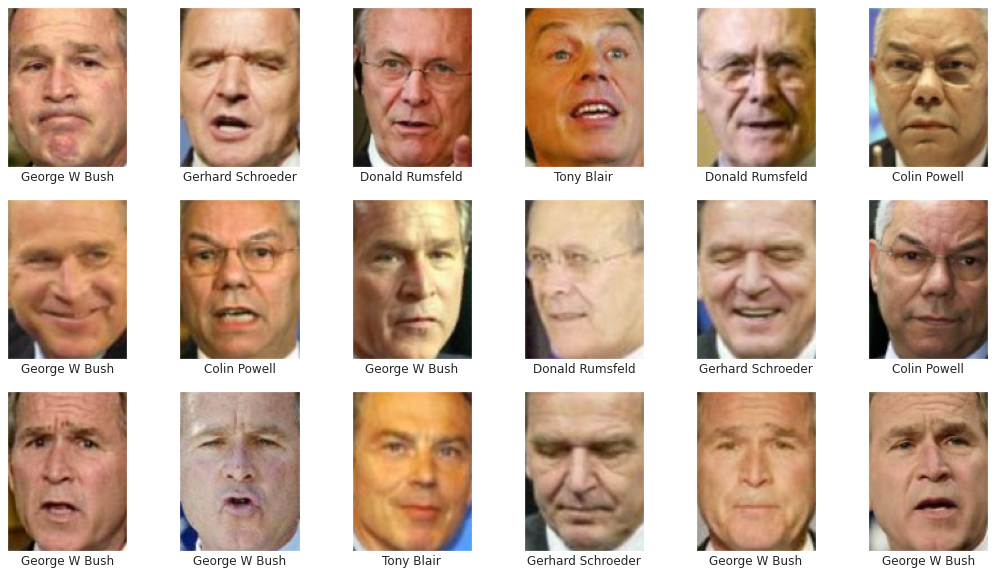

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(3, 6, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
  axi.imshow(X[i]/255)
  axi.set(xticks=[], yticks=[], xlabel=target_name[y[i]])

In [ ]:
x=preprocess_input(X)
y=to_categorical(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
y_test.shape

(285, 5)

In [ ]:
inputs = k.Input(shape=(224, 224, 3))
res = k.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=inputs)

In [ ]:
for layer in res.layers:
    layer.trainable = False

In [ ]:
model =Sequential()
model.add(Resizing(224, 224))
model.add(res)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=k.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
27/27 [==============================] - 9s 193ms/step - loss: 0.7037 - accuracy: 0.7684 - val_loss: 0.1888 - val_accuracy: 0.9439
Epoch 2/10
27/27 [==============================] - 4s 158ms/step - loss: 0.0159 - accuracy: 0.9977 - val_loss: 0.1475 - val_accuracy: 0.9579
Epoch 3/10
27/27 [==============================] - 4s 162ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9719
Epoch 4/10
27/27 [==============================] - 4s 161ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9684
Epoch 5/10
27/27 [==============================] - 4s 160ms/step - loss: 7.4176e-04 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9684
Epoch 6/10
27/27 [==============================] - 4s 158ms/step - loss: 6.2676e-04 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9684
Epoch 7/10
27/27 [==============================] - 4s 155ms/step - loss: 5.5366e-04 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0

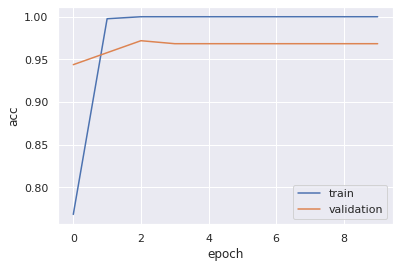

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
y_predicted = model.predict(x_test)


9/9 [==============================] - 2s 94ms/step


In [ ]:
y_predicted=y_predicted.argmax(axis=1)

In [ ]:
y_test=y_test.argmax(axis=1)

In [ ]:
print(target_name[y_test[1]])
print(target_name[y_predicted[1]])

Colin Powell
Colin Powell
